<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [172]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [173]:
df

Country (region)  Ladder  SD of Ladder  Positive affect  \
0                     Finland       1             4             41.0   
1                     Denmark       2            13             24.0   
2                      Norway       3             8             16.0   
3                     Iceland       4             9              3.0   
4                 Netherlands       5             1             12.0   
..                        ...     ...           ...              ...   
151                    Rwanda     152            63             54.0   
152                  Tanzania     153           122             78.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   
155               South Sudan     156           140            127.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
0               10.0             2.0      5.0         4.0        47.0   
1               26.0             4.0      6.0         3.0        22.0   
2               29.0             3.0      3.0         8.0        11.0   
3                3.0             1.0      7.0        45.0         3.0   
4               25.0            15.0     19.0        12.0         7.0   
..               ...             ...      ...         ...         ...   
151            102.0           144.0     21.0         2.0        90.0   
152             50.0           131.0     78.0        34.0        49.0   
153            133.0           151.0    155.0       136.0       137.0   
154            153.0           155.0    133.0       122.0       113.0   
155            152.0           148.0    154.0        61.0        85.0   

     Log of GDP\nper capita  Healthy life\nexpectancy  
0                      22.0                      27.0  
1                      14.0                      23.0  
2                       7.0                      12.0  
3                      15.0                      13.0  
4                      12.0                      18.0  
..                      ...                       ...  
151                   132.0                     103.0  
152                   125.0                     118.0  
153                   134.0                     139.0  
154                   152.0                     150.0  
155                   140.0                     143.0  

[156 rows x 11 columns]

In [174]:
#Проверяем наличие пустых ячеек
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [194]:
#Убираем Nan-ы меняя на среднее значение столбца
df.fillna(df['Positive affect'].mean(), inplace=True)
df.fillna(df['Negative affect'].mean(), inplace=True)
df.fillna(df['Social support'].mean(), inplace=True)
df.fillna(df['Corruption'].mean(), inplace=True)
df.fillna(df['Generosity'].mean(), inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            156 non-null float64
Negative affect            156 non-null float64
Social support             156 non-null float64
Freedom                    156 non-null float64
Corruption                 156 non-null float64
Generosity                 156 non-null float64
Log of GDP
per capita      156 non-null float64
Healthy life
expectancy    156 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB
None


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

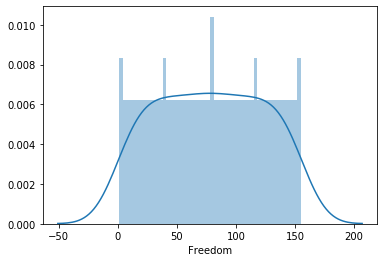

In [195]:
sns.distplot(df.Freedom, 50)

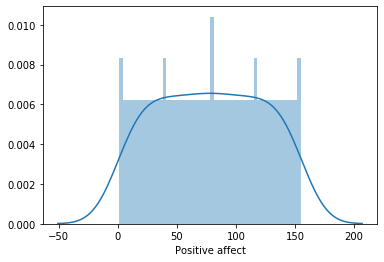

In [196]:
sns.distplot(df['Positive affect'],50)
#Равномерноое распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [197]:
print('Среднее значение',df.Freedom.mean())
print('Медиана: ', statistics.median(df['Freedom']))
print('Минимальное значение',df.Freedom.min())
print('Максимальное значение',df.Freedom.max())
print('Размах выборки', df.Freedom.max()-df.Freedom.min()) 
print('Мода - значение, которое наиболее часто встречается в выборке!!!! В нашей выборке повторяющиеся значения отсутствуют')
print('Стандартное распределение', statistics.pstdev(df.Freedom))
print('Дисперсия', statistics.pvariance(df.Freedom))

Среднее значение 78.0
Медиана:  78.0
Минимальное значение 1.0
Максимальное значение 155.0
Размах выборки 154.0
Мода - значение, которое наиболее часто встречается в выборке!!!! В нашей выборке повторяющиеся значения отсутствуют
Стандартное распределение 44.60007473835292
Дисперсия 1989.1666666666667


Почему нельзя найти моду?

Мода - значение, которое наиболее часто встречается в выборке!!!! В нашей выборке повторяющиеся значения отсутствуют

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

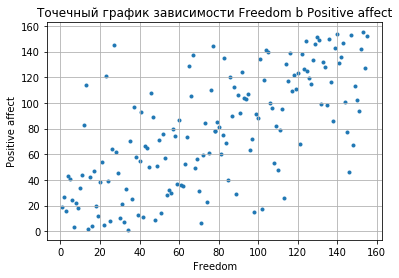

In [198]:
freedom = df['Freedom']
affect = df['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости Freedom b Positive affect')
plt.grid(True)
plt.scatter(freedom, affect, marker='.')

In [199]:
pearsonr(freedom, affect)

(0.6817698430601657, 1.16357803303857e-22)

Знак коффицента говорит о направленности вектора зависимости- прямая положительная зависимость( с увеличением одного показателя, растёт второй)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [211]:
from sklearn import preprocessing
freedom = df.Freedom
print('mean',statistics.mean(freedom))
freedom_n = freedom - statistics.mean(freedom)
print('min',min(freedom_n))
print('max',max(freedom_n))
print('new_mean',statistics.mean(freedom_n))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_n2 = min_max_scaler.fit_transform(np.array(freedom_n).reshape(-1, 1))
print(min(freedom_n2))
print(max(freedom_n2))
print('mean_n',statistics.mean(freedom_n))

mean 78.0
min -77.0
max 77.0
new_mean 0.0
[-1.]
[1.]
mean_n 0.0


Построить матрицу корреляций для всех колонок таблицы

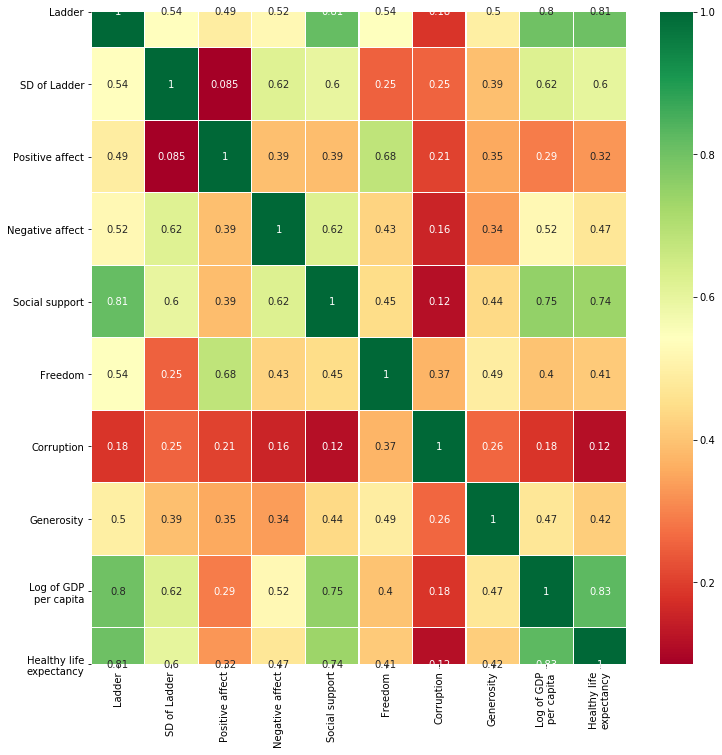

In [212]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [213]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avo_df=pd.read_csv(url)
avo_df[:3]

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany

Сделать частотный график колонки AveragePrice. Какое это распределение?

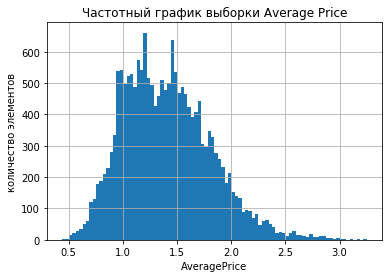

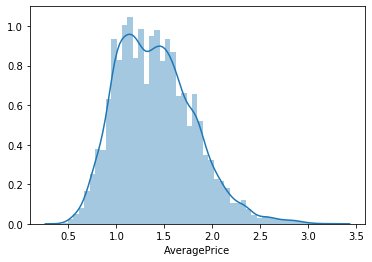

In [216]:
plt.hist(avo_df.AveragePrice,90)
plt.xlabel('AveragePrice')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки Average Price')
plt.grid(True)
plt.show()
sns.distplot(avo_df.AveragePrice)

#Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

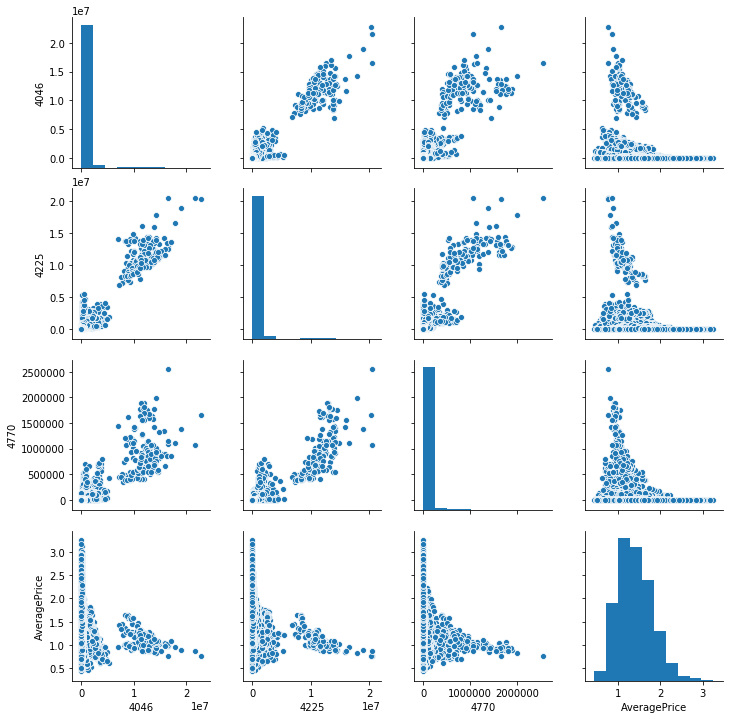

In [215]:
sns_plot = sns.pairplot(
    avo_df[['4046', '4225', '4770','AveragePrice']])
sns_plot

Можно отметить прямую линейную зависимость между столбцами 4225 и 4046, AveragePrice и 4770(Нормальное распределение)
На основании графика (и понимая причино-следственную связь) можно сделать предположение о необходимой средней цене продажи, позволяющей продать больший объём авокадо, или исходя из объёма различных видов Авокада выстроить прогноз по оптимальному ценообразованию. 